In [1]:
from autogen_agentchat.agents import AssistantAgent

In [3]:
from autogen_ext.models.openai import OpenAIChatCompletionClient
from dotenv import load_dotenv
import os

load_dotenv()
api_key = os.getenv('OPENAI_API_KEY')

In [4]:
model_client = OpenAIChatCompletionClient(model='gpt-4o',api_key=api_key)

In [5]:
my_assistant = AssistantAgent(name='Assistant',model_client=model_client)

In [6]:
result = await my_assistant.run(task='Who are you')
print(result)

messages=[TextMessage(id='471d7608-3c0e-483d-a1e4-d2d8503f57f7', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 11, 12, 40, 13, 969668, tzinfo=datetime.timezone.utc), content='Who are you', type='TextMessage'), TextMessage(id='f54840e0-b08c-4a90-b286-bff8b28ced61', source='Assistant', models_usage=RequestUsage(prompt_tokens=39, completion_tokens=34), metadata={}, created_at=datetime.datetime(2025, 7, 11, 12, 40, 17, 706937, tzinfo=datetime.timezone.utc), content="I'm an AI assistant designed to help you with a variety of tasks, answer questions, and provide information. If you need help with anything specific, feel free to ask!", type='TextMessage')] stop_reason=None


In [7]:
result = await my_assistant.run(task='What was the last question I asked?')
print(result)

messages=[TextMessage(id='0f33fa9f-e1ec-4cee-b1c8-24445af3f7de', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 11, 12, 41, 19, 937922, tzinfo=datetime.timezone.utc), content='What was the last question I asked?', type='TextMessage'), TextMessage(id='c948c183-f6ba-4ecb-af75-85275a64c859', source='Assistant', models_usage=RequestUsage(prompt_tokens=90, completion_tokens=48), metadata={}, created_at=datetime.datetime(2025, 7, 11, 12, 41, 21, 810200, tzinfo=datetime.timezone.utc), content="I'm sorry, but I don't have the capability to recall past interactions or questions from before our current session. Each session is treated as a new interaction without memory of prior sessions. However, I'm here to help with any questions you have now!", type='TextMessage')] stop_reason=None


In [8]:
result = await my_assistant.run(task='What was last 2 questions I asked ?')
print(result)

messages=[TextMessage(id='afecdcf1-e3ef-4c00-9a27-ae5149f65848', source='user', models_usage=None, metadata={}, created_at=datetime.datetime(2025, 7, 11, 12, 42, 6, 41880, tzinfo=datetime.timezone.utc), content='What was last 2 questions I asked ?', type='TextMessage'), TextMessage(id='70e060de-b963-4eef-b33c-64b6438bbaf3', source='Assistant', models_usage=RequestUsage(prompt_tokens=156, completion_tokens=45), metadata={}, created_at=datetime.datetime(2025, 7, 11, 12, 42, 8, 657407, tzinfo=datetime.timezone.utc), content='The last two questions you asked in this session were: \n\n1. "Who are you"\n2. "What was the last question I asked?"\n\nIf you have any more questions or need assistance, feel free to ask!', type='TextMessage')] stop_reason=None


In [10]:
print(result.messages[-1].content)

The last two questions you asked in this session were: 

1. "Who are you"
2. "What was the last question I asked?"

If you have any more questions or need assistance, feel free to ask!


In [11]:
agent_state = await my_assistant.save_state()
print(agent_state)

{'type': 'AssistantAgentState', 'version': '1.0.0', 'llm_context': {'messages': [{'content': 'Who are you', 'source': 'user', 'type': 'UserMessage'}, {'content': "I'm an AI assistant designed to help you with a variety of tasks, answer questions, and provide information. If you need help with anything specific, feel free to ask!", 'thought': None, 'source': 'Assistant', 'type': 'AssistantMessage'}, {'content': 'What was the last question I asked?', 'source': 'user', 'type': 'UserMessage'}, {'content': "I'm sorry, but I don't have the capability to recall past interactions or questions from before our current session. Each session is treated as a new interaction without memory of prior sessions. However, I'm here to help with any questions you have now!", 'thought': None, 'source': 'Assistant', 'type': 'AssistantMessage'}, {'content': 'What was last 2 questions I asked ?', 'source': 'user', 'type': 'UserMessage'}, {'content': 'The last two questions you asked in this session were: \n\n1


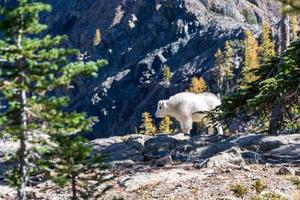

In [12]:
from io import BytesIO

import PIL
import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image

# Create a multi-modal message with random image and text.
pil_image = PIL.Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = Image(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="user")
img
